# Making Pickle Batches
As the Stanford Researchers did in their experiment, we have one batch of 40 batteries to train the model, a second batch of 40 batteries to test the model, and a third batch of 40 batteries for a second suite of test after improvements.

Here is the code used to create the pickle batches, you will not need to run this to create the model, as the pickle files are included in a google drive link which can be found in the README. However, I will also include the link to the batchdata files hosted by Stanford if you'd like to make some changes.

## Batch 1

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pickle

In [2]:
matFilename = '2017-05-12_batchdata_updated_struct_errorcorrect.mat'
f = h5py.File(matFilename)

<ipython-input-2-453f878db293>:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(matFilename)


In [3]:
list(f.keys())

['#refs#', '#subsystem#', 'batch', 'batch_date']

In [4]:
batch = f['batch']

In [5]:
list(batch.keys())

['Vdlin',
 'barcode',
 'channel_id',
 'cycle_life',
 'cycles',
 'policy',
 'policy_readable',
 'summary']

In [6]:
num_cells = batch['summary'].shape[0]
bat_dict = {}
for i in range(num_cells):
    cl = f[batch['cycle_life'][i,0]].value
    policy = f[batch['policy_readable'][i,0]].value.tobytes()[::2].decode()
    summary_IR = np.hstack(f[batch['summary'][i,0]]['IR'][0,:].tolist())
    summary_QC = np.hstack(f[batch['summary'][i,0]]['QCharge'][0,:].tolist())
    summary_QD = np.hstack(f[batch['summary'][i,0]]['QDischarge'][0,:].tolist())
    summary_TA = np.hstack(f[batch['summary'][i,0]]['Tavg'][0,:].tolist())
    summary_TM = np.hstack(f[batch['summary'][i,0]]['Tmin'][0,:].tolist())
    summary_TX = np.hstack(f[batch['summary'][i,0]]['Tmax'][0,:].tolist())
    summary_CT = np.hstack(f[batch['summary'][i,0]]['chargetime'][0,:].tolist())
    summary_CY = np.hstack(f[batch['summary'][i,0]]['cycle'][0,:].tolist())
    summary = {'IR': summary_IR, 'QC': summary_QC, 'QD': summary_QD, 'Tavg':
                summary_TA, 'Tmin': summary_TM, 'Tmax': summary_TX, 'chargetime': summary_CT,
                'cycle': summary_CY}
    cycles = f[batch['cycles'][i,0]]
    cycle_dict = {}
    for j in range(cycles['I'].shape[0]):
        I = np.hstack((f[cycles['I'][j,0]].value))
        Qc = np.hstack((f[cycles['Qc'][j,0]].value))
        Qd = np.hstack((f[cycles['Qd'][j,0]].value))
        Qdlin = np.hstack((f[cycles['Qdlin'][j,0]].value))
        T = np.hstack((f[cycles['T'][j,0]].value))
        Tdlin = np.hstack((f[cycles['Tdlin'][j,0]].value))
        V = np.hstack((f[cycles['V'][j,0]].value))
        dQdV = np.hstack((f[cycles['discharge_dQdV'][j,0]].value))
        t = np.hstack((f[cycles['t'][j,0]].value))
        cd = {'I': I, 'Qc': Qc, 'Qd': Qd, 'Qdlin': Qdlin, 'T': T, 'Tdlin': Tdlin, 'V':V, 'dQdV': dQdV, 't':t}
        cycle_dict[str(j)] = cd
        
    cell_dict = {'cycle_life': cl, 'charge_policy':policy, 'summary': summary, 'cycles': cycle_dict}
    key = 'b1c' + str(i)
    bat_dict[key]=   cell_dict

<ipython-input-6-14ecbffc4fcb>:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  cl = f[batch['cycle_life'][i,0]].value
<ipython-input-6-14ecbffc4fcb>:5: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  policy = f[batch['policy_readable'][i,0]].value.tobytes()[::2].decode()
<ipython-input-6-14ecbffc4fcb>:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  I = np.hstack((f[cycles['I'][j,0]].value))
<ipython-input-6-14ecbffc4fcb>:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  Qc = np.hstack((f[cycles['Qc'][j,0]].value))
<ipython-input-6-14ecbffc4fcb>:22: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  Qd = np.hstack((f[cycles['Qd'][j,0]].value))
<ipython-input-6-14ecbffc4fcb>:23: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  Qdlin = np.hstack((f[cycles['Qdl

In [7]:
bat_dict.keys()

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c8', 'b1c9', 'b1c10', 'b1c11', 'b1c12', 'b1c13', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c22', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45'])

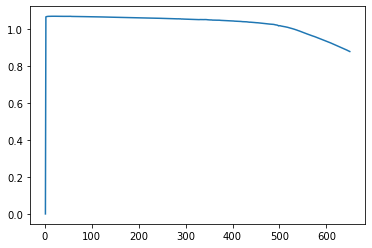

In [8]:
# Confirm Our Data is Loaded Correctly
plt.plot(bat_dict['b1c43']['summary']['cycle'], bat_dict['b1c43']['summary']['QD'])

In [9]:
with open('data/batch1.pkl','wb') as fp:
        pickle.dump(bat_dict,fp)

## Batch 2

In [10]:
matFilename = '2017-06-30_batchdata_updated_struct_errorcorrect.mat'
f = h5py.File(matFilename)

<ipython-input-10-6d3d9b5e19fe>:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(matFilename)


In [11]:
list(f.keys())

['#refs#', '#subsystem#', 'batch', 'batch_date']

In [12]:
batch = f['batch']

In [13]:
list(batch.keys())

['Vdlin',
 'barcode',
 'channel_id',
 'cycle_life',
 'cycles',
 'policy',
 'policy_readable',
 'summary']

In [14]:
num_cells = batch['summary'].shape[0]
bat_dict = {}
for i in range(num_cells):
    cl = f[batch['cycle_life'][i,0]].value
    policy = f[batch['policy_readable'][i,0]].value.tobytes()[::2].decode()
    summary_IR = np.hstack(f[batch['summary'][i,0]]['IR'][0,:].tolist())
    summary_QC = np.hstack(f[batch['summary'][i,0]]['QCharge'][0,:].tolist())
    summary_QD = np.hstack(f[batch['summary'][i,0]]['QDischarge'][0,:].tolist())
    summary_TA = np.hstack(f[batch['summary'][i,0]]['Tavg'][0,:].tolist())
    summary_TM = np.hstack(f[batch['summary'][i,0]]['Tmin'][0,:].tolist())
    summary_TX = np.hstack(f[batch['summary'][i,0]]['Tmax'][0,:].tolist())
    summary_CT = np.hstack(f[batch['summary'][i,0]]['chargetime'][0,:].tolist())
    summary_CY = np.hstack(f[batch['summary'][i,0]]['cycle'][0,:].tolist())
    summary = {'IR': summary_IR, 'QC': summary_QC, 'QD': summary_QD, 'Tavg':
                summary_TA, 'Tmin': summary_TM, 'Tmax': summary_TX, 'chargetime': summary_CT,
                'cycle': summary_CY}
    cycles = f[batch['cycles'][i,0]]
    cycle_dict = {}
    for j in range(cycles['I'].shape[0]):
        I = np.hstack((f[cycles['I'][j,0]].value))
        Qc = np.hstack((f[cycles['Qc'][j,0]].value))
        Qd = np.hstack((f[cycles['Qd'][j,0]].value))
        Qdlin = np.hstack((f[cycles['Qdlin'][j,0]].value))
        T = np.hstack((f[cycles['T'][j,0]].value))
        Tdlin = np.hstack((f[cycles['Tdlin'][j,0]].value))
        V = np.hstack((f[cycles['V'][j,0]].value))
        dQdV = np.hstack((f[cycles['discharge_dQdV'][j,0]].value))
        t = np.hstack((f[cycles['t'][j,0]].value))
        cd = {'I': I, 'Qc': Qc, 'Qd': Qd, 'Qdlin': Qdlin, 'T': T, 'Tdlin': Tdlin, 'V':V, 'dQdV': dQdV, 't':t}
        cycle_dict[str(j)] = cd
        
    cell_dict = {'cycle_life': cl, 'charge_policy':policy, 'summary': summary, 'cycles': cycle_dict}
    key = 'b2c' + str(i)
    bat_dict[key]=   cell_dict

<ipython-input-14-0aaff8355223>:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  cl = f[batch['cycle_life'][i,0]].value
<ipython-input-14-0aaff8355223>:5: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  policy = f[batch['policy_readable'][i,0]].value.tobytes()[::2].decode()
<ipython-input-14-0aaff8355223>:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  I = np.hstack((f[cycles['I'][j,0]].value))
<ipython-input-14-0aaff8355223>:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  Qc = np.hstack((f[cycles['Qc'][j,0]].value))
<ipython-input-14-0aaff8355223>:22: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  Qd = np.hstack((f[cycles['Qd'][j,0]].value))
<ipython-input-14-0aaff8355223>:23: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  Qdlin = np.hstack((f[cycle

In [15]:
bat_dict.keys()

dict_keys(['b2c0', 'b2c1', 'b2c2', 'b2c3', 'b2c4', 'b2c5', 'b2c6', 'b2c7', 'b2c8', 'b2c9', 'b2c10', 'b2c11', 'b2c12', 'b2c13', 'b2c14', 'b2c15', 'b2c16', 'b2c17', 'b2c18', 'b2c19', 'b2c20', 'b2c21', 'b2c22', 'b2c23', 'b2c24', 'b2c25', 'b2c26', 'b2c27', 'b2c28', 'b2c29', 'b2c30', 'b2c31', 'b2c32', 'b2c33', 'b2c34', 'b2c35', 'b2c36', 'b2c37', 'b2c38', 'b2c39', 'b2c40', 'b2c41', 'b2c42', 'b2c43', 'b2c44', 'b2c45', 'b2c46', 'b2c47'])

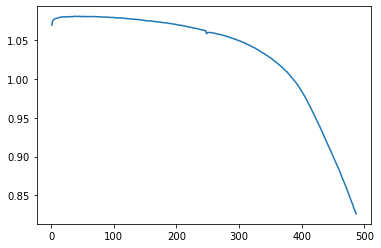

In [16]:
# Confirm Our Data is Loaded Correctly
plt.plot(bat_dict['b2c43']['summary']['cycle'], bat_dict['b2c43']['summary']['QD'])

In [17]:
with open('data/batch2.pkl','wb') as fp:
        pickle.dump(bat_dict,fp)

## Batch 3

In [18]:
matFilename = '2018-04-12_batchdata_updated_struct_errorcorrect.mat'
f = h5py.File(matFilename)

<ipython-input-18-0f32ee944c66>:2: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  f = h5py.File(matFilename)


In [19]:
list(f.keys())

['#refs#', '#subsystem#', 'batch', 'batch_date']

In [20]:
batch = f['batch']

In [21]:
list(batch.keys())

['Vdlin',
 'barcode',
 'channel_id',
 'cycle_life',
 'cycles',
 'policy',
 'policy_readable',
 'summary']

In [22]:
num_cells = batch['summary'].shape[0]
bat_dict = {}
for i in range(num_cells):
    cl = f[batch['cycle_life'][i,0]].value
    policy = f[batch['policy_readable'][i,0]].value.tobytes()[::2].decode()
    summary_IR = np.hstack(f[batch['summary'][i,0]]['IR'][0,:].tolist())
    summary_QC = np.hstack(f[batch['summary'][i,0]]['QCharge'][0,:].tolist())
    summary_QD = np.hstack(f[batch['summary'][i,0]]['QDischarge'][0,:].tolist())
    summary_TA = np.hstack(f[batch['summary'][i,0]]['Tavg'][0,:].tolist())
    summary_TM = np.hstack(f[batch['summary'][i,0]]['Tmin'][0,:].tolist())
    summary_TX = np.hstack(f[batch['summary'][i,0]]['Tmax'][0,:].tolist())
    summary_CT = np.hstack(f[batch['summary'][i,0]]['chargetime'][0,:].tolist())
    summary_CY = np.hstack(f[batch['summary'][i,0]]['cycle'][0,:].tolist())
    summary = {'IR': summary_IR, 'QC': summary_QC, 'QD': summary_QD, 'Tavg':
                summary_TA, 'Tmin': summary_TM, 'Tmax': summary_TX, 'chargetime': summary_CT,
                'cycle': summary_CY}
    cycles = f[batch['cycles'][i,0]]
    cycle_dict = {}
    for j in range(cycles['I'].shape[0]):
        I = np.hstack((f[cycles['I'][j,0]].value))
        Qc = np.hstack((f[cycles['Qc'][j,0]].value))
        Qd = np.hstack((f[cycles['Qd'][j,0]].value))
        Qdlin = np.hstack((f[cycles['Qdlin'][j,0]].value))
        T = np.hstack((f[cycles['T'][j,0]].value))
        Tdlin = np.hstack((f[cycles['Tdlin'][j,0]].value))
        V = np.hstack((f[cycles['V'][j,0]].value))
        dQdV = np.hstack((f[cycles['discharge_dQdV'][j,0]].value))
        t = np.hstack((f[cycles['t'][j,0]].value))
        cd = {'I': I, 'Qc': Qc, 'Qd': Qd, 'Qdlin': Qdlin, 'T': T, 'Tdlin': Tdlin, 'V':V, 'dQdV': dQdV, 't':t}
        cycle_dict[str(j)] = cd
        
    cell_dict = {'cycle_life': cl, 'charge_policy':policy, 'summary': summary, 'cycles': cycle_dict}
    key = 'b3c' + str(i)
    bat_dict[key]=   cell_dict

<ipython-input-22-636ed3c25165>:4: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  cl = f[batch['cycle_life'][i,0]].value
<ipython-input-22-636ed3c25165>:5: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  policy = f[batch['policy_readable'][i,0]].value.tobytes()[::2].decode()
<ipython-input-22-636ed3c25165>:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  I = np.hstack((f[cycles['I'][j,0]].value))
<ipython-input-22-636ed3c25165>:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  Qc = np.hstack((f[cycles['Qc'][j,0]].value))
<ipython-input-22-636ed3c25165>:22: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  Qd = np.hstack((f[cycles['Qd'][j,0]].value))
<ipython-input-22-636ed3c25165>:23: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  Qdlin = np.hstack((f[cycle

In [23]:
bat_dict.keys()

dict_keys(['b3c0', 'b3c1', 'b3c2', 'b3c3', 'b3c4', 'b3c5', 'b3c6', 'b3c7', 'b3c8', 'b3c9', 'b3c10', 'b3c11', 'b3c12', 'b3c13', 'b3c14', 'b3c15', 'b3c16', 'b3c17', 'b3c18', 'b3c19', 'b3c20', 'b3c21', 'b3c22', 'b3c23', 'b3c24', 'b3c25', 'b3c26', 'b3c27', 'b3c28', 'b3c29', 'b3c30', 'b3c31', 'b3c32', 'b3c33', 'b3c34', 'b3c35', 'b3c36', 'b3c37', 'b3c38', 'b3c39', 'b3c40', 'b3c41', 'b3c42', 'b3c43', 'b3c44', 'b3c45'])

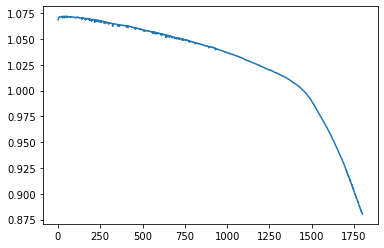

In [25]:
# Confirm Our Data is Loaded Correctly
plt.plot(bat_dict['b3c45']['summary']['cycle'], bat_dict['b3c45']['summary']['QD'])

In [26]:
with open('data/batch3.pkl','wb') as fp:
        pickle.dump(bat_dict,fp)